In [5]:
import pandas as pd  
df = pd.read_csv(r"C:\!!!TITANIC\Titanic.csv")  
df.head()

,PassengerId,Survived,PassengerClass,Name,Sex,Age,Siblings,Children,Ticket,Fare,Cabin,PortEmbarked
0,1,0,3,"<b>Braund, Mr. Owen Harris</b>",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


In [6]:
df.isnull().sum()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   PassengerClass  891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             714 non-null    float64
 6   Siblings        891 non-null    int64  
 7   Children        891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            889 non-null    float64
 10  Cabin           204 non-null    object 
 11  PortEmbarked    889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1]:
df.describe()

NameError: name 'df' is not defined

In [8]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['PortEmbarked'].fillna(df['PortEmbarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df.head()

,PassengerId,Survived,PassengerClass,Name,Sex,Age,Siblings,Children,Ticket,Fare,PortEmbarked
0,1,0,3,"<b>Braund, Mr. Owen Harris</b>",male,22.0,1,0,A/5 21171,7.2500,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton


In [9]:
df.Name

0                         <b>Braund, Mr. Owen Harris</b>
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [10]:
df['Title']=df['Name'].str.extract('([A-Za-z]+)\.',expand=False)
df['Title'].value_counts()
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace(['Mme'], 'Mrs')
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 
                                   'Don', 'Dr', 'Major', 'Rev', 'Sir', 
                                   'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].map({ 'Mr': 1, 'Miss': 2,'Mrs': 3, 'Master': 4,'Rare': 5})
df.head()

,PassengerId,Survived,PassengerClass,Name,Sex,Age,Siblings,Children,Ticket,Fare,PortEmbarked,Title
0,1,0,3,"<b>Braund, Mr. Owen Harris</b>",male,22.0,1,0,A/5 21171,7.2500,Southampton,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton,1


In [11]:
df = pd.read_csv(r"C:\!!!TITANIC\Titanic.csv")

In [12]:
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace(['Mme'], 'Mrs')
df['Title'] = df['Title'].replace(
    ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 
    'Rare')
df['Title'] = df['Title'].map({ 'Mr': 1,'Miss': 2, 'Mrs': 3,'Master': 4,'Rare': 5})
df.drop(columns=['Name'], inplace=True)
df.head()

,PassengerId,Survived,PassengerClass,Sex,Age,Siblings,Children,Ticket,Fare,Cabin,PortEmbarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,3
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,2
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,Southampton,3
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,Southampton,1


In [13]:
df.drop(columns=['Ticket'], inplace=True, errors='ignore')
df.drop(columns=['Cabin'], inplace=True, errors='ignore')
df.head()

,PassengerId,Survived,PassengerClass,Sex,Age,Siblings,Children,Fare,PortEmbarked,Title
0,1,0,3,male,22.0,1,0,7.2500,Southampton,1
1,2,1,1,female,38.0,1,0,71.2833,Cherbourg,3
2,3,1,3,female,26.0,0,0,7.9250,Southampton,2
3,4,1,1,female,35.0,1,0,53.1000,Southampton,3
4,5,0,3,male,35.0,0,0,8.0500,Southampton,1


In [14]:
from sklearn.preprocessing import LabelEncoder

def label_encode(df, columns):
    le = LabelEncoder()
    for col in columns:
        df[col] = le.fit_transform(df[col])
    return df
df = label_encode(df, ['Sex', 'PortEmbarked'])

In [11]:
df.head()

,PassengerId,Survived,PassengerClass,Name,Sex,Age,Siblings,Children,Fare,PortEmbarked
0,1,0,3,"<b>Braund, Mr. Owen Harris</b>",1,22.0,1,0,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2


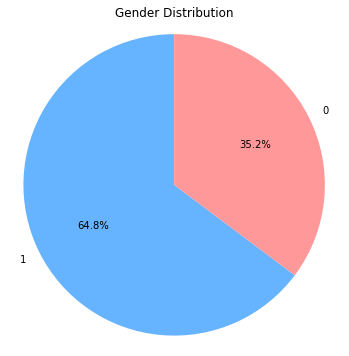

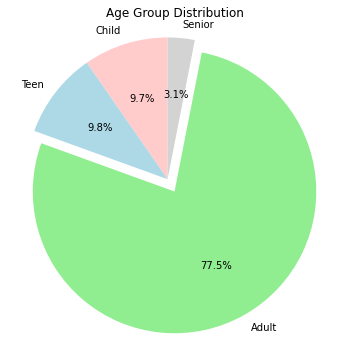

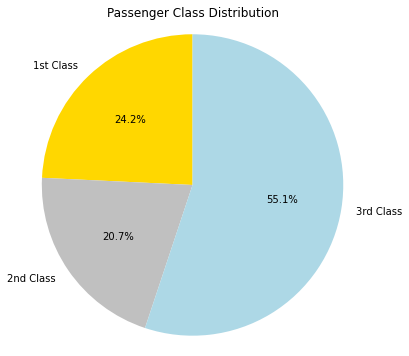

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

#Gender
gender_counts = df['Sex'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

# age groups
bins = [0, 12, 18, 60, 100]
labels = ['Child', 'Teen', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
agegroup_counts = df['AgeGroup'].value_counts().sort_index()
colors = ['#ffcccb', '#add8e6', '#90ee90', '#d3d3d3']  # red,blue,green,grey
explode = [0, 0, 0.1, 0]  
plt.figure(figsize=(6, 6))
plt.pie(agegroup_counts,  labels=agegroup_counts.index,  autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Age Group Distribution')
plt.axis('equal')
plt.show()

#PassengerClass
pclass_counts = df['PassengerClass'].value_counts().sort_index()
labels = ['1st Class', '2nd Class', '3rd Class']
plt.figure(figsize=(6, 6))
plt.pie(pclass_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['gold', 'silver', 'lightblue'])
plt.title('Passenger Class Distribution')
plt.axis('equal')
plt.show()

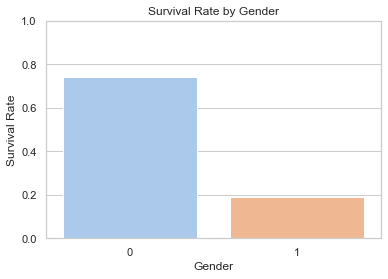

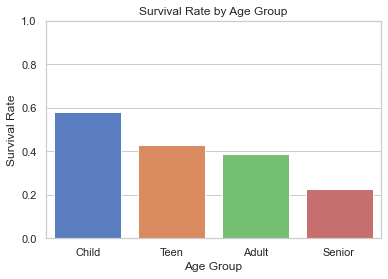

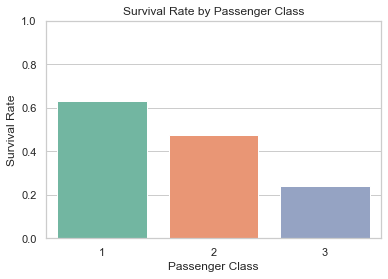

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Gender vs Survival Rate
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Sex', y='Survived', ci=None, palette='pastel')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.ylim(0, 1)
plt.show()

# Age Group vs Survival Rate
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='AgeGroup', y='Survived', ci=None, palette='muted')
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.ylim(0, 1)
plt.show()

# Passenger Class vs Survival Rate
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='PassengerClass', y='Survived', ci=None, palette='Set2')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.ylim(0, 1)
plt.show()

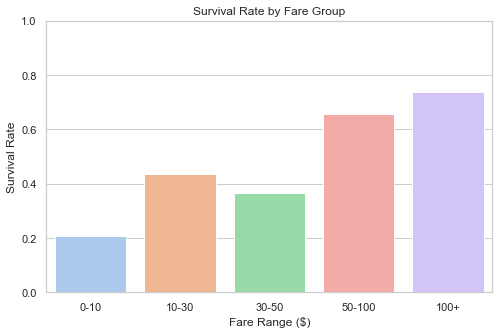

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Create fare bins
fare_bins = [0, 10, 30, 50, 100, 600]
fare_labels = ['0-10', '10-30', '30-50', '50-100', '100+']
df['FareGroup'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels)

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='FareGroup', y='Survived', ci=None, palette='pastel')
plt.title('Survival Rate by Fare Group')
plt.xlabel('Fare Range ($)')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

In [18]:
df['FamilySize'] = df['Siblings'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df[['Siblings','FamilySize', 'IsAlone']].head(10)

,Siblings,FamilySize,IsAlone
0,1,2,0
1,1,2,0
2,0,1,1
3,1,2,0
4,0,1,1
5,0,1,1
6,0,1,1
7,3,4,0
8,0,1,1
9,1,2,0


In [20]:
df.head()

,PassengerId,Survived,PassengerClass,Sex,Age,Siblings,Children,Fare,PortEmbarked,Title,AgeGroup,FareGroup,FamilySize,IsAlone
0,1,0,3,1,22.0,1,0,7.2500,2,1,Adult,0-10,2,0
1,2,1,1,0,38.0,1,0,71.2833,0,3,Adult,50-100,2,0
2,3,1,3,0,26.0,0,0,7.9250,2,2,Adult,0-10,1,1
3,4,1,1,0,35.0,1,0,53.1000,2,3,Adult,50-100,2,0
4,5,0,3,1,35.0,0,0,8.0500,2,1,Adult,0-10,1,1


In [29]:
x['Age'] = x['Age'].fillna(x['Age'].median())
x['Fare'] = x['Fare'].fillna(x['Fare'].median())

features = ['PassengerId', 'Sex', 'Age', 'Fare', 'PortEmbarked', 'Title', 'FamilySize', 'IsAlone']
from sklearn.model_selection import train_test_split
x = df[features]
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<ipython-input-29-8b3d0f37b485>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Age'] = x['Age'].fillna(x['Age'].median())
<ipython-input-29-8b3d0f37b485>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Fare'] = x['Fare'].fillna(x['Fare'].median())


In [24]:
df.head()

,PassengerId,Survived,PassengerClass,Sex,Age,Siblings,Children,Fare,PortEmbarked,Title,AgeGroup,FareGroup,FamilySize,IsAlone
0,1,0,3,1,22.0,1,0,7.2500,2,1,Adult,0-10,2,0
1,2,1,1,0,38.0,1,0,71.2833,0,3,Adult,50-100,2,0
2,3,1,3,0,26.0,0,0,7.9250,2,2,Adult,0-10,1,1
3,4,1,1,0,35.0,1,0,53.1000,2,3,Adult,50-100,2,0
4,5,0,3,1,35.0,0,0,8.0500,2,1,Adult,0-10,1,1


In [27]:
print(x.isnull().sum())

PassengerId       0
Sex               0
Age             177
Fare              2
PortEmbarked      0
Title             0
FamilySize        0
IsAlone           0
dtype: int64


In [31]:
x = df[features].copy()
x['Age'] = x['Age'].fillna(x['Age'].median())
x['Fare'] = x['Fare'].fillna(x['Fare'].median())

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

# Predict and evaluate
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: {:.2f}%".format(accuracy * 100))

Model Accuracy: 79.89%
